In [11]:
# 导入需要的库
import pandas as pd
import sequenzo
# 导入相关的数据

file_path = 'D:\\南非\\Adult_W5_Anon_V1.0.0.dta'

df = pd.read_stata(file_path)

print(df.head())

# 查看这个数据集中有多少个变量

column_names = df.columns.tolist()

print(column_names)


               w5_a_outcome  w5_hhid     pid w5_a_intrv_d w5_a_intrv_m  \
0  Successfully Interviewed   500000  640576          3rd      October   
1  Successfully Interviewed   500001  405734          2nd         June   
2  Successfully Interviewed   500002  305961         15th       August   
3  Successfully Interviewed   500002  731651         15th       August   
4  Successfully Interviewed   500003  303668         14th        March   

  w5_a_intrv_y w5_a_refexpl w5_a_refexpl_o w5_a_refint w5_a_refgen  ...  \
0       2017.0          NaN                        NaN         NaN  ...   
1       2017.0          NaN                        NaN         NaN  ...   
2       2017.0          NaN                        NaN         NaN  ...   
3       2017.0          NaN                        NaN         NaN  ...   
4       2017.0          NaN                        NaN         NaN  ...   

  w5_a_intlng10 w5_a_intlng11 w5_a_intlng_o                  w5_a_intresp  \
0           NaN           N

In [12]:
# 根据数据集的问卷内容，适合做life course data的变量，有如下两个：

# H15b（ed#curatt）或者H17（ed#culev）其中 `#` 代表年份的变化

# 时间变化是2008年到2017年，H15b是描述此人那一年的是否在接受教育，H17是描述此人那一年接受教育的等级。

# 先提取出变量H15b和H17，并对他们有一个大致的认识，由于H17的状态更具有丰富性所以优先查看H17。

# 那么 H17（ed#culev）在数据集中对应的是哪些列呢？

# 寻找名字含有 ed 和 lev 的列

ed_lev_columns = [col for col in column_names if 'ed' in col and 'lev' in col]

if ed_lev_columns:
    print("是的，数据集中包含以下同时含有 'ed' 和 'lev' 的列：")
    print(ed_lev_columns)
else:
    print("不，数据集中没有找到同时含有 'ed' 和 'lev' 的列名。")


#  然后你就发现有非常多的内容和不同的后缀，回到网页中去找codebook发现codebook有点隐蔽，在 data discription 里面找到了具体的描述
#  h17_17 - Educational level respondent is currently enrolled in 2017 (w5_a_ed17curlev)
#  h17_16 - Educational level respondent was enrolled in 2016 (w5_a_ed16lev)
#  h17_13 - Educational level respondent was enrolled in 2013 (w5_a_ed13lev)
#  所以可以看到我们就找到规律了w5_a_ed#lev，其中 # 代表不同的年份


是的，数据集中包含以下同时含有 'ed' 和 'lev' 的列：
['w5_a_edterlev', 'w5_a_edterlev_o', 'w5_a_ed17curlev', 'w5_a_ed17curlev_o', 'w5_a_ed16lev', 'w5_a_ed16lev_o', 'w5_a_ed15lev', 'w5_a_ed15lev_o', 'w5_a_ed14lev', 'w5_a_ed14lev_flg', 'w5_a_ed14lev_o', 'w5_a_ed14lev_o_flg', 'w5_a_ed13lev', 'w5_a_ed13lev_flg', 'w5_a_ed13lev_o', 'w5_a_ed13lev_o_flg', 'w5_a_ed12lev', 'w5_a_ed12lev_flg', 'w5_a_ed12lev_o', 'w5_a_ed12lev_o_flg', 'w5_a_ed11lev', 'w5_a_ed11lev_flg', 'w5_a_ed11lev_o', 'w5_a_ed11lev_o_flg', 'w5_a_ed10lev', 'w5_a_ed10lev_flg', 'w5_a_ed10lev_o', 'w5_a_ed10lev_o_flg', 'w5_a_ed09lev', 'w5_a_ed09lev_flg', 'w5_a_ed09lev_o', 'w5_a_ed09lev_o_flg', 'w5_a_ed08lev', 'w5_a_ed08lev_flg', 'w5_a_ed08lev_o', 'w5_a_ed08lev_o_flg']


In [13]:

# 对应到df中， 变量是 w5_a_ed#lev，我们只需要这个结构的内容，其他的后缀都和研究目标无关。

# 由于H17的状态更具有丰富性所以优先查看H17

regex_pattern = r'^w5_a_ed(0[8-9]|1[0-7])lev$'  # 使用更精确的正则表达式，避免匹配到后缀
education_level = df.filter(regex=regex_pattern, axis=1)

# --- 新增的逻辑 ---
# 定义优先选择的列名
priority_col = 'w5_a_ed17lev'

# 检查优先列是否存在于已筛选的 DataFrame 中
if priority_col in education_level.columns:
    # 如果存在，则新的 DataFrame 只包含这一列
    education_level = education_level[[priority_col]]
    print(f"检测到并优先选择了 '{priority_col}' 列。")
else:
    # 如果不存在，则保留所有已匹配的列，并给出提示
    print(f"未找到优先列 '{priority_col}'，保留所有其他匹配的 'ed...lev' 列。")
# --- 逻辑结束 ---


# 显示最终 DataFrame 的信息
print("\n最终选定的列名:", education_level.columns.tolist())
print("\n最终 DataFrame 的前五行:")
print(education_level.head())


未找到优先列 'w5_a_ed17lev'，保留所有其他匹配的 'ed...lev' 列。

最终选定的列名: ['w5_a_ed16lev', 'w5_a_ed15lev', 'w5_a_ed14lev', 'w5_a_ed13lev', 'w5_a_ed12lev', 'w5_a_ed11lev', 'w5_a_ed10lev', 'w5_a_ed09lev', 'w5_a_ed08lev']

最终 DataFrame 的前五行:
  w5_a_ed16lev w5_a_ed15lev w5_a_ed14lev w5_a_ed13lev w5_a_ed12lev  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

             w5_a_ed11lev            w5_a_ed10lev            w5_a_ed09lev  \
0                     NaN                     NaN                     NaN   
1  Grade 11/Std. 9/Form 4  Grade 11/Std. 9/Form 4  Grade 10/Std. 8/Form 3   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN 

🔍 Missing Value Summary
----------------------------------------
[Columns with Missing Values]
              Missing Count  Missing (%)
w5_a_ed14lev          25422        84.43
w5_a_ed12lev          25291        84.00
w5_a_ed16lev          25274        83.94
w5_a_ed11lev          25255        83.88
w5_a_ed09lev          25212        83.73
w5_a_ed13lev          25121        83.43
w5_a_ed10lev          24706        82.05
w5_a_ed15lev          24590        81.67
w5_a_ed08lev          24444        81.18

[Top 5 Rows with Most Missing Values]
       Missing Count
30109              9
0                  9
30108              9
2                  9
3                  9


<Figure size 1000x500 with 0 Axes>

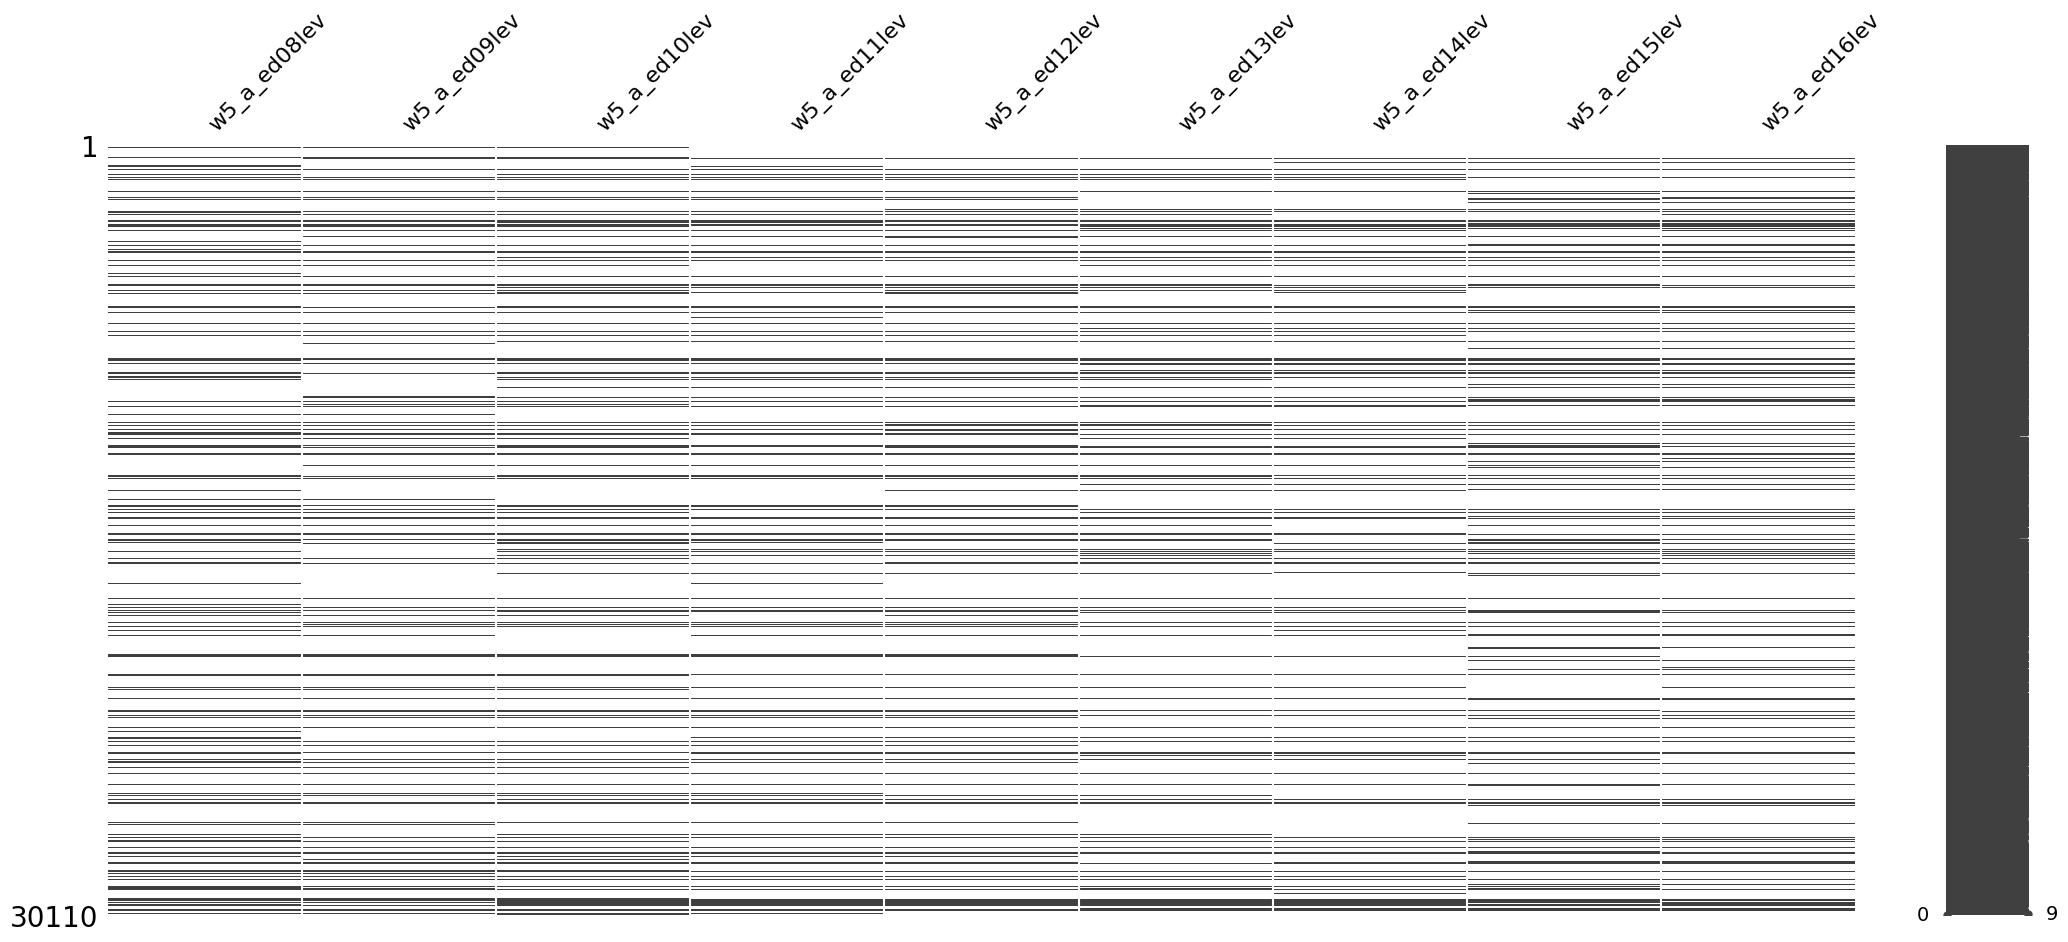

In [14]:
# 查看缺失值

from sequenzo.data_preprocessing.helpers import summarize_missing_values

summarize_missing_values(
    df,
    plot=True,
    top_n=5,
    columns=[
    'w5_a_ed08lev', 'w5_a_ed09lev', 'w5_a_ed10lev', 
    'w5_a_ed11lev', 'w5_a_ed12lev', 'w5_a_ed13lev', 
    'w5_a_ed14lev', 'w5_a_ed15lev', 'w5_a_ed16lev'
],
    mode='matrix',
    figsize=(10, 5),
    save_as=None,
    show=True
)


In [15]:
# 数据清洗

# 1. 定义您要求必须全部存在的列名列表
required_columns = [
    'w5_a_ed08lev', 'w5_a_ed09lev', 'w5_a_ed10lev', 
    'w5_a_ed11lev', 'w5_a_ed12lev', 'w5_a_ed13lev', 
    'w5_a_ed14lev', 'w5_a_ed15lev', 'w5_a_ed16lev'
]
# 检查筛选前的数据集大小
print(f"原始数据集的行数: {len(df)}")
print(f"原始数据集的维度: {df.shape}")

# 2. 使用 dropna() 进行筛选
# subset 参数告诉 pandas 只在这些指定的列中检查缺失值 (NaN)。
# 默认情况下，只要这些列中'任何一个'(any)是缺失值，该行就会被删除。
df_education = df.dropna(subset=required_columns)

# 3. 检查筛选后的结果
print(f"\n筛选后剩余的行数: {len(df_education)}")
print(f"筛选后的数据集维度: {df_education.shape}")

# 显示新 DataFrame 的前几行，以确认结果
print("\n筛选后数据的前五行:")
print(df_education.head())


原始数据集的行数: 30110
原始数据集的维度: (30110, 1144)

筛选后剩余的行数: 2046
筛选后的数据集维度: (2046, 1144)

筛选后数据的前五行:
                w5_a_outcome  w5_hhid     pid w5_a_intrv_d w5_a_intrv_m  \
17  Successfully Interviewed   500008  408602          6th      October   
32  Successfully Interviewed   500016  409704         19th         July   
61  Successfully Interviewed   500026  405423         30th         July   
68  Successfully Interviewed   500030  403409          8th        April   
69  Successfully Interviewed   500030  405186          9th        April   

   w5_a_intrv_y w5_a_refexpl w5_a_refexpl_o w5_a_refint w5_a_refgen  ...  \
17       2017.0          NaN                        NaN         NaN  ...   
32       2017.0          NaN                        NaN         NaN  ...   
61       2017.0          NaN                        NaN         NaN  ...   
68       2017.0          NaN                        NaN         NaN  ...   
69       2017.0          NaN                        NaN         NaN  ...   



🔍 Missing Value Summary
----------------------------------------
[Columns with Missing Values]
Empty DataFrame
Columns: [Missing Count, Missing (%)]
Index: []


<Figure size 1000x500 with 0 Axes>

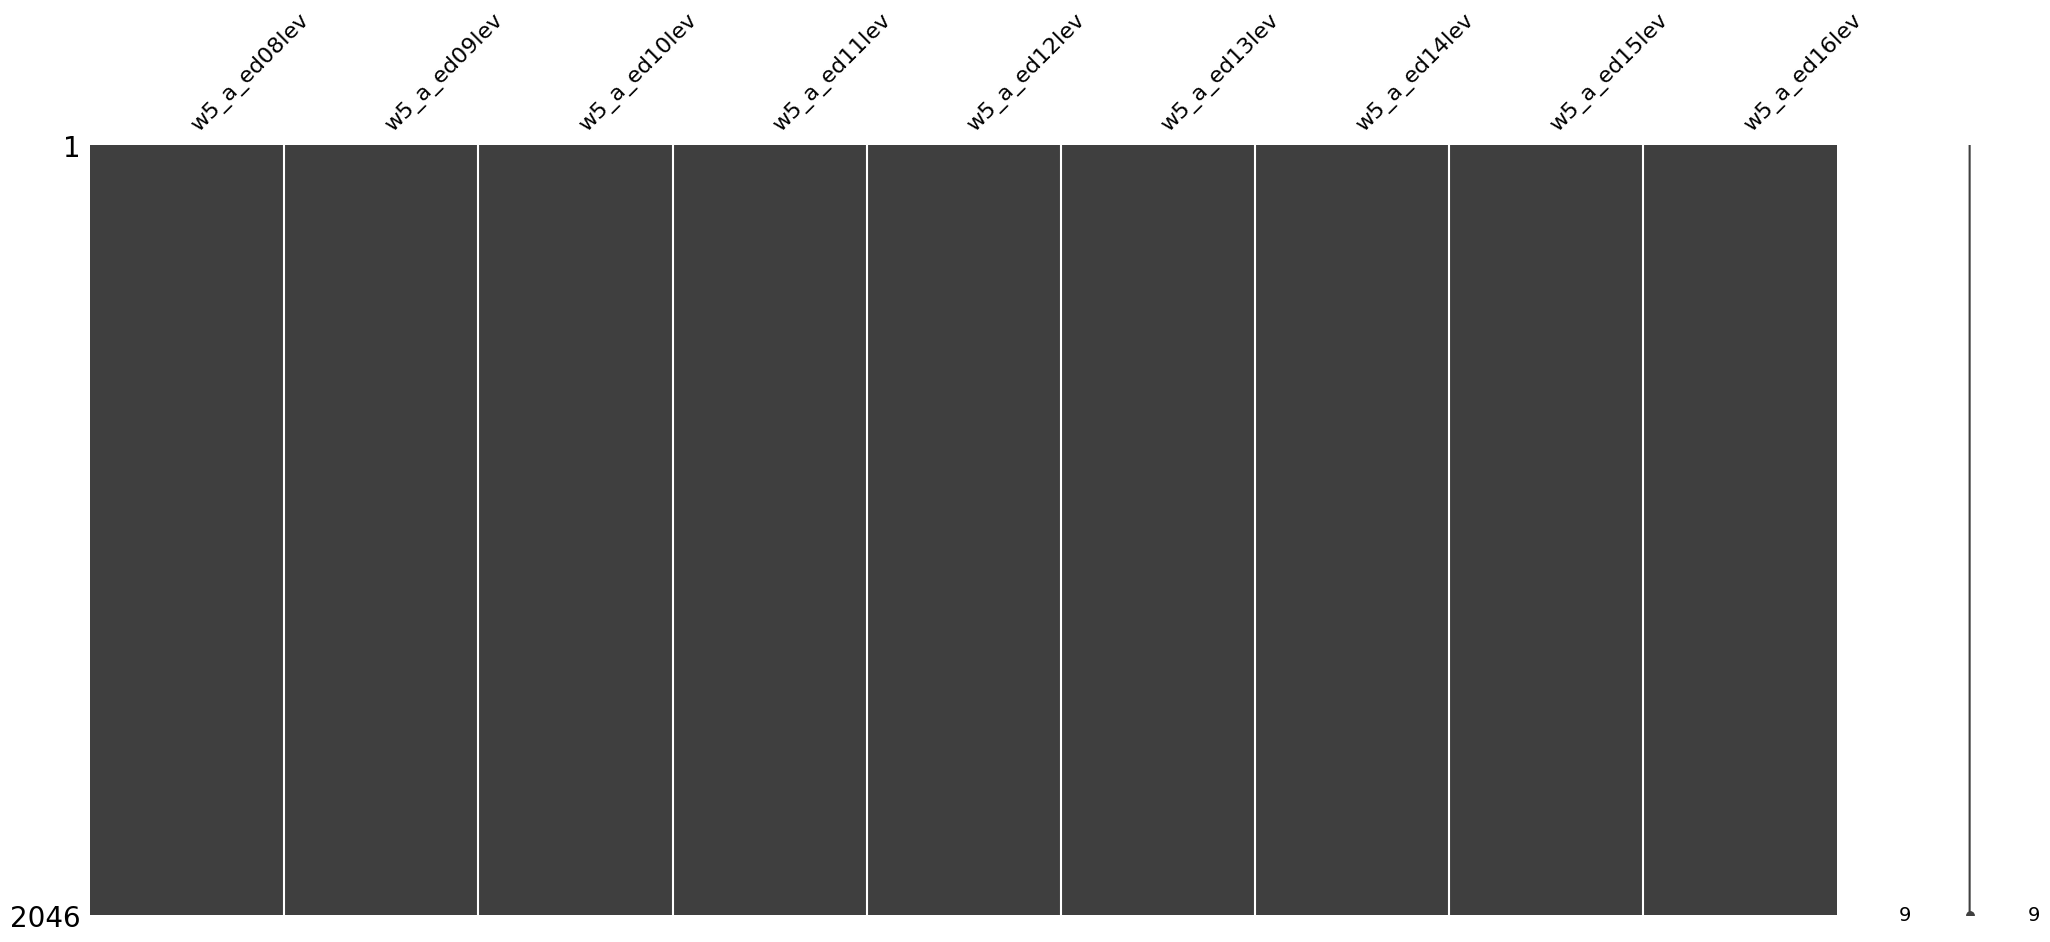

In [16]:
#  查看清洗后的缺失值

summarize_missing_values(
    df_education,
    plot=True,
    top_n=5,
    columns=[
    'w5_a_ed08lev', 'w5_a_ed09lev', 'w5_a_ed10lev', 
    'w5_a_ed11lev', 'w5_a_ed12lev', 'w5_a_ed13lev', 
    'w5_a_ed14lev', 'w5_a_ed15lev', 'w5_a_ed16lev'
],
    mode='matrix',
    figsize=(10, 5),
    save_as=None,
    show=True
)


In [17]:
from sequenzo import wide_to_long_format_data

# 转换为长格式
df_long = wide_to_long_format_data(
    df_education,                  # 输入的宽格式数据表（清洗并重命名后的df）
    id_col="pid",                  # 个体标识列的名称（假设你的df中此列为'pid'）
    time_cols=[
    'w5_a_ed08lev', 'w5_a_ed09lev', 'w5_a_ed10lev', 
    'w5_a_ed11lev', 'w5_a_ed12lev', 'w5_a_ed13lev', 
    'w5_a_ed14lev', 'w5_a_ed15lev', 'w5_a_ed16lev'
],  # 年份列（对应你想要转成长格式的列）
    var_name="year",               # 新生成的“时间列”叫“year”
    value_name="state"             # 新生成的“状态列”叫“state”
)

# 检查转换结果
print(df_long.head())


      pid          year                  state
0  408602  w5_a_ed08lev         Grade 3/Std. 1
1  409704  w5_a_ed08lev         Grade 3/Std. 1
2  405423  w5_a_ed08lev         Grade 5/Std. 3
3  403409  w5_a_ed08lev         Grade 4/Std. 2
4  405186  w5_a_ed08lev  Grade 2/Sub B/Class 2


In [18]:
 # 检查状态列一共有多少种不同的状态
unique_states = df_long['state'].unique()
print(f'该序列一共有{len(unique_states)}种不同的状态：')
unique_states


该序列一共有31种不同的状态：


array(['Grade 3/Std. 1', 'Grade 5/Std. 3', 'Grade 4/Std. 2',
       'Grade 2/Sub B/Class 2', 'Grade 1/Sub A/Class 1', 'Grade 6/Std. 4',
       'Grade 7/Std. 5', 'Grade 8/Std. 6/Form 1', 'Grade R/0', 'Missing',
       'Grade 9/Std. 7/Form 2', 'Grade 11/Std. 9/Form 4',
       'Grade 10/Std. 8/Form 3', 'Other (specify)',
       'Grade 12/Std. 10/Form 5/Matric/Senior Certificate',
       'Diploma requiring Grade 12/Std. 10', 'Bachelors Degree',
       'National Certificate Vocational 2 (NCV 2)', 'N1 (NATED)/NTC 1',
       'Certificate not requiring Grade 12/Std. 10', 'N2 (NATED)/NTC 2',
       'Certificate requiring Grade 12/Std. 10',
       'National Certificate Vocational 3 (NCV 3)',
       'Diploma not requiring Grade 12/Std. 10',
       'National Certificate Vocational 4 (NCV 4)', 'N4 (NATED)',
       'N5 (NATED)', 'N3 (NATED)/NTC 3', 'Bachelors Degree and diploma',
       "Don't know", 'N6 (NATED)'], dtype=object)

In [19]:

# 统计每种 state 的出现次数和占比
state_counts = df_long['state'].value_counts(dropna=False)
state_percent = df_long['state'].value_counts(normalize=True, dropna=False) * 100

# 每种状态的数量和百分比
state_stats = pd.DataFrame({
    'Count': state_counts,
    'Percent': state_percent.round(2)
})
print(state_stats)


                                                   Count  Percent
state                                                            
Grade 8/Std. 6/Form 1                               2175    11.81
Grade 7/Std. 5                                      2116    11.49
Grade 6/Std. 4                                      2069    11.24
Grade 9/Std. 7/Form 2                               2001    10.87
Grade 5/Std. 3                                      1954    10.61
Grade 4/Std. 2                                      1766     9.59
Grade 10/Std. 8/Form 3                              1745     9.48
Grade 3/Std. 1                                      1344     7.30
Grade 11/Std. 9/Form 4                              1023     5.56
Grade 2/Sub B/Class 2                                595     3.23
Grade 12/Std. 10/Form 5/Matric/Senior Certificate    461     2.50
Grade 1/Sub A/Class 1                                458     2.49
Missing                                              342     1.86
Diploma re

In [20]:
# 查看该序列的人群的年龄分布
df_education['w5_a_dob_y'].value_counts()\

SyntaxError: incomplete input (2220282493.py, line 2)

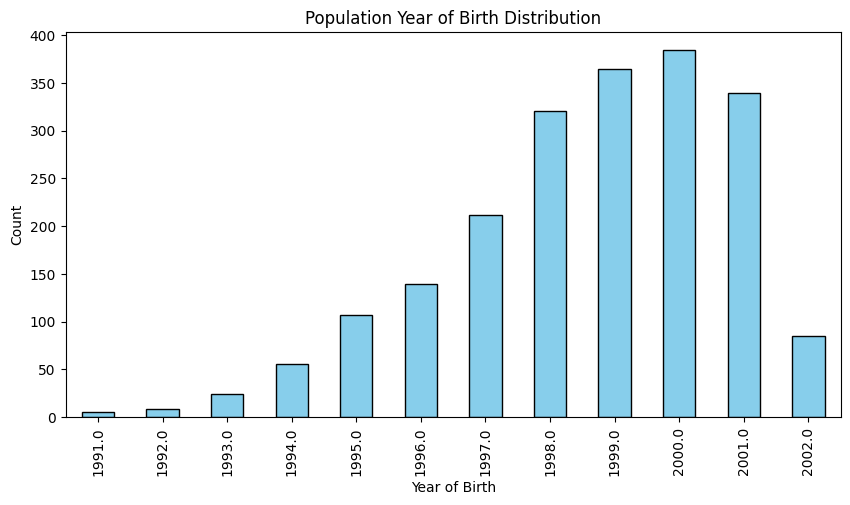

In [21]:
# 查看该序列的人群的年龄分布
df_education['w5_a_dob_y'].value_counts()\

import matplotlib.pyplot as plt
import numpy as np

years = np.arange(df_education['w5_a_dob_y'].min(), df_education['w5_a_dob_y'].max()+1)
counts = df_education['w5_a_dob_y'].value_counts().reindex(years, fill_value=0)

plt.figure(figsize=(10, 5))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.title('Population Year of Birth Distribution')
plt.show()


In [22]:
# 查看性别分布

df_education['w5_a_gen'].value_counts()


w5_a_gen
Male      1084
Female     962
Name: count, dtype: int64

In [23]:
# 查看是否结婚

df_education['w5_a_evmar'].value_counts()

w5_a_evmar
No            2035
Don't know       0
Refused          0
Yes              0
Name: count, dtype: int64

In [24]:
# 查看是否生过小孩

df_education['w5_a_bhbrth'].value_counts()

w5_a_bhbrth
No     805
Yes    157
Name: count, dtype: int64

In [25]:
# 生小孩的数量

df_education['w5_a_bhcnt1con'].value_counts()

w5_a_bhcnt1con
1.0     150
2.0       6
3.0       1
4.0       0
5.0       0
6.0       0
7.0       0
8.0       0
9.0       0
10.0      0
11.0      0
12.0      0
13.0      0
14.0      0
15.0      0
Name: count, dtype: int64

In [26]:
# 目标结构：
# 行 1996,1997,1998的人
# 列名 12,13,14,15,16,17,18

# 1996 

# 使用修正后、顺序正确的字典
rename_dict_sorted = {
    'pid': 'id',
    'w5_a_ed08lev': '12',
    'w5_a_ed09lev': '13',
    'w5_a_ed10lev': '14',
    'w5_a_ed11lev': '15',
    'w5_a_ed12lev': '16',
    'w5_a_ed13lev': '17',
    'w5_a_ed14lev': '18',
    'w5_a_gen': 'gender' 
}

# 链式操作现在会直接产生正确顺序的列
df_1996 = (
    df[df['w5_a_dob_y'] == 1996]
    [list(rename_dict_sorted.keys())]  # 这里的键列表已经是您想要的顺序
    .rename(columns=rename_dict_sorted)
)

# 查看最终结果
print(df_1996)
print(f"最终形状: {df_1996.shape}")

           id                     12                     13  \
61     405423         Grade 5/Std. 3         Grade 6/Std. 4   
84     491186         Grade 5/Std. 3         Grade 6/Std. 4   
112    772709                    NaN                    NaN   
169    406878         Grade 5/Std. 3         Grade 6/Std. 4   
191    406846  Grade 8/Std. 6/Form 1  Grade 9/Std. 7/Form 2   
...       ...                    ...                    ...   
29957  735587                    NaN                    NaN   
30031  412040                    NaN                    NaN   
30051  406598         Grade 6/Std. 4         Grade 7/Std. 5   
30066  716487                    NaN                    NaN   
30072  405827         Grade 6/Std. 4                    NaN   

                           14                      15  \
61             Grade 7/Std. 5   Grade 8/Std. 6/Form 1   
84             Grade 7/Std. 5   Grade 8/Std. 6/Form 1   
112                       NaN                     NaN   
169            

In [27]:
# 1997

# 使用修正后、顺序正确的字典
rename_dict_sorted = {
    'pid': 'id',
    'w5_a_ed09lev': '12',
    'w5_a_ed10lev': '13',
    'w5_a_ed11lev': '14',
    'w5_a_ed12lev': '15',
    'w5_a_ed13lev': '16',
    'w5_a_ed14lev': '17',
    'w5_a_ed15lev': '18',
    'w5_a_gen': 'gender' 
}

# 链式操作现在会直接产生正确顺序的列
df_1997 = (
    df[df['w5_a_dob_y'] == 1997]
    [list(rename_dict_sorted.keys())]  # 这里的键列表已经是您想要的顺序
    .rename(columns=rename_dict_sorted)
)

# 查看最终结果
print(df_1997)
print(f"最终形状: {df_1997.shape}")

           id              12              13                     14  \
57     723337  Grade 6/Std. 4  Grade 7/Std. 5                    NaN   
60     733305             NaN             NaN                    NaN   
92     410205             NaN             NaN         Grade 7/Std. 5   
108    402674  Grade 5/Std. 3  Grade 6/Std. 4         Grade 7/Std. 5   
130    406653  Grade 6/Std. 4  Grade 7/Std. 5  Grade 8/Std. 6/Form 1   
...       ...             ...             ...                    ...   
29814  402705  Grade 5/Std. 3  Grade 6/Std. 4         Grade 7/Std. 5   
29835  734240             NaN             NaN                    NaN   
29848  492795  Grade 4/Std. 2  Grade 5/Std. 3                    NaN   
29941  401128             NaN             NaN  Grade 8/Std. 6/Form 1   
29982  727153             NaN             NaN                    NaN   

                          15                      16                      17  \
57                       NaN  Grade 10/Std. 8/Form 3  G

In [28]:
# 1998

# 使用修正后、顺序正确的字典
rename_dict_sorted = {
    'pid': 'id',
    'w5_a_ed10lev': '12',
    'w5_a_ed11lev': '13',
    'w5_a_ed12lev': '14',
    'w5_a_ed13lev': '16',
    'w5_a_ed14lev': '17',
    'w5_a_ed15lev': '18',
    'w5_a_ed15lev': '18',
}

# 链式操作现在会直接产生正确顺序的列
df_1998 = (
    df[df['w5_a_dob_y'] == 1997]
    [list(rename_dict_sorted.keys())]  # 这里的键列表已经是您想要的顺序
    .rename(columns=rename_dict_sorted)
)

# 查看最终结果
print(df_1998)
print(f"最终形状: {df_1998.shape}")

           id              12                     13                     14  \
57     723337  Grade 7/Std. 5                    NaN                    NaN   
60     733305             NaN                    NaN                    NaN   
92     410205             NaN         Grade 7/Std. 5  Grade 8/Std. 6/Form 1   
108    402674  Grade 6/Std. 4         Grade 7/Std. 5  Grade 8/Std. 6/Form 1   
130    406653  Grade 7/Std. 5  Grade 8/Std. 6/Form 1  Grade 9/Std. 7/Form 2   
...       ...             ...                    ...                    ...   
29814  402705  Grade 6/Std. 4         Grade 7/Std. 5  Grade 8/Std. 6/Form 1   
29835  734240             NaN                    NaN                    NaN   
29848  492795  Grade 5/Std. 3                    NaN         Grade 6/Std. 4   
29941  401128             NaN  Grade 8/Std. 6/Form 1  Grade 8/Std. 6/Form 1   
29982  727153             NaN                    NaN                    NaN   

                           16                      

In [29]:
# 为每个DataFrame添加出生年份列，以便在合并后区分
df_1996['birth_year'] = 1996
df_1997['birth_year'] = 1997
df_1998['birth_year'] = 1998

# 使用concat函数垂直拼接三个DataFrame
import pandas as pd
df_combined = pd.concat([df_1996, df_1997, df_1998], ignore_index=True)

In [30]:
# 假设df中有关于生孩子的列名为'has_child'，性别的列名为'gender'
# 如果列名不同，请替换为实际的列名
df_info = df[['pid', 'w5_a_bhbrth', 'w5_a_gen']].rename(columns={'pid': 'id'})

# 使用merge基于id列合并信息
df_final = pd.merge(
    df_combined,
    df_info,
    on='id',
    how='left',
    suffixes=('_original', '')  # 如果有重复列，为原始列添加后缀
)

In [31]:
print(df_final.head())
print(f"最终DataFrame形状: {df_final.shape}")

       id                     12                     13  \
0  405423         Grade 5/Std. 3         Grade 6/Std. 4   
1  491186         Grade 5/Std. 3         Grade 6/Std. 4   
2  772709                    NaN                    NaN   
3  406878         Grade 5/Std. 3         Grade 6/Std. 4   
4  406846  Grade 8/Std. 6/Form 1  Grade 9/Std. 7/Form 2   

                       14                      15  \
0          Grade 7/Std. 5   Grade 8/Std. 6/Form 1   
1          Grade 7/Std. 5   Grade 8/Std. 6/Form 1   
2                     NaN                     NaN   
3          Grade 7/Std. 5          Grade 7/Std. 5   
4  Grade 10/Std. 8/Form 3  Grade 11/Std. 9/Form 4   

                                                  16                      17  \
0                              Grade 9/Std. 7/Form 2  Grade 10/Std. 8/Form 3   
1                              Grade 9/Std. 7/Form 2   Grade 9/Std. 7/Form 2   
2                                                NaN                     NaN   
3     

In [32]:
df_final = df_final.rename(columns={
    'w5_a_bhbrth': 'has_child',
    'w5_a_gen': 'gender'         
})

In [33]:
df_final

,id,12,13,14,15,16,17,18,gender,birth_year,has_child,gender
0,405423,Grade 5/Std. 3,Grade 6/Std. 4,Grade 7/Std. 5,Grade 8/Std. 6/Form 1,Grade 9/Std. 7/Form 2,Grade 10/Std. 8/Form 3,Grade 10/Std. 8/Form 3,Female,1996,No,Female
1,491186,Grade 5/Std. 3,Grade 6/Std. 4,Grade 7/Std. 5,Grade 8/Std. 6/Form 1,Grade 9/Std. 7/Form 2,Grade 9/Std. 7/Form 2,Grade 9/Std. 7/Form 2,Female,1996,Yes,Female
2,772709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,1996,Yes,Female
3,406878,Grade 5/Std. 3,Grade 6/Std. 4,Grade 7/Std. 5,Grade 7/Std. 5,Grade 8/Std. 6/Form 1,NaN,NaN,Male,1996,NaN,Male
4,406846,Grade 8/Std. 6/Form 1,Grade 9/Std. 7/Form 2,Grade 10/Std. 8/Form 3,Grade 11/Std. 9/Form 4,Grade 12/Std. 10/Form 5/Matric/Senior Certificate,Bachelors Degree,NaN,Female,1996,No,Female
...,...,...,...,...,...,...,...,...,...,...,...,...
2130,402705,Grade 6/Std. 4,Grade 7/Std. 5,Grade 8/Std. 6/Form 1,NaN,Grade 10/Std. 8/Form 3,Grade 11/Std. 9/Form 4,Grade 12/Std. 10/Form 5/Matric/Senior Certificate,NaN,1998,No,Female
2131,734240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,Yes,Female
2132,492795,Grade 5/Std. 3,NaN,Grade 6/Std. 4,NaN,NaN,NaN,NaN,NaN,1998,NaN,Male
2133,401128,NaN,Grade 8/Std. 6/Form 1,Grade 8/Std. 6/Form 1,NaN,Grade 9/Std. 7/Form 2,Grade 9/Std. 7/Form 2,Grade 10/Std. 8/Form 3,NaN,1998,NaN,Male


In [34]:
import pandas as pd
import numpy as np

# 1. 将所有目标列的值合并成一个Series
all_values = pd.Series()
for col in ['12', '13', '14', '15', '16', '17', '18']:
    all_values = pd.concat([all_values, df_final[col]])

# 2. 计算唯一值、计数和比例
value_counts = all_values.value_counts(dropna=False)
total_values = len(all_values)
value_proportions = value_counts / total_values * 100

# 3. 创建结果DataFrame
results = pd.DataFrame({
    '计数': value_counts,
    '比例(%)': value_proportions
}).reset_index().rename(columns={'index': '唯一值'})

# 4. 按计数降序排列
results = results.sort_values('计数', ascending=False)

# 5. 显示结果
print(f"总值数量: {total_values}")
print(f"唯一值数量: {len(value_counts)}")
print("\n前20个最常见的值:")
print(results.head(20))

# 6. NaN值的统计
nan_count = all_values.isna().sum()
nan_proportion = nan_count / total_values * 100
print(f"\nNaN值数量: {nan_count} ({nan_proportion:.2f}%)")

# 7. 可选：保存完整结果到CSV
# results.to_csv("column_value_statistics.csv", index=False)

总值数量: 14945
唯一值数量: 24

前20个最常见的值:
                                                  唯一值    计数      比例(%)
0                                                 NaN  5321  35.603881
1                               Grade 9/Std. 7/Form 2  1758  11.763131
2                              Grade 10/Std. 8/Form 3  1596  10.679157
3                               Grade 8/Std. 6/Form 1  1548  10.357979
4                                      Grade 7/Std. 5  1356   9.073269
5                                      Grade 6/Std. 4  1051   7.032452
6                              Grade 11/Std. 9/Form 4   917   6.135831
7                                      Grade 5/Std. 3   495   3.312145
8   Grade 12/Std. 10/Form 5/Matric/Senior Certificate   423   2.830378
9                                             Missing   186   1.244563
10                                     Grade 4/Std. 2   182   1.217799
11                                     Grade 3/Std. 1    50   0.334560
12         Certificate not requiring Grade 

In [35]:
# 1. 定义要检查的列和要移除的值
columns_to_check = ['12', '13', '14', '15', '16', '17', '18']
values_to_remove = ["NaN", "Missing", "Other (specify)", "Don't know"]

# 2. 创建df_final的副本用于清理
df_cleaned = df_final.copy()

# 3. 创建一个布尔掩码，标识所有需要保留的行（不包含指定值的行）
keep_rows = True  # 默认保留所有行
for col in columns_to_check:
    for value in values_to_remove:
        # 累积筛选条件，任何一列包含任何一个指定值都会被排除
        keep_rows = keep_rows & (df_cleaned[col] != value)

# 4. 应用掩码筛选数据框
df_cleaned = df_cleaned[keep_rows]

# 5. 重置索引
df_cleaned = df_cleaned.reset_index(drop=True)

# 6. 显示清理结果
original_rows = len(df_final)
cleaned_rows = len(df_cleaned)
removed_rows = original_rows - cleaned_rows

print(f"原始数据框：{original_rows} 行")
print(f"清理后数据框：{cleaned_rows} 行")
print(f"已删除：{removed_rows} 行 ({removed_rows/original_rows:.2%})")

# 7. 可选：检查是否成功移除了所有指定值
values_remaining = False
for col in columns_to_check:
    for value in values_to_remove:
        if (df_cleaned[col] == value).any():
            print(f"警告：清理后在列 '{col}' 中仍存在值 '{value}'")
            values_remaining = True

if not values_remaining:
    print("成功：所有指定值已被完全清除")

原始数据框：2135 行
清理后数据框：1946 行
已删除：189 行 (8.85%)
成功：所有指定值已被完全清除


In [36]:
# 定义要检查的列
columns_to_check = ['12', '13', '14', '15', '16', '17', '18']

# 1. 检查每列的唯一值数量
print("每列的唯一值数量:")
for col in columns_to_check:
    unique_count = df_cleaned[col].nunique()
    print(f"列 '{col}': {unique_count} 个唯一值")

# 2. 显示每列的唯一值
print("\n每列的唯一值:")
for col in columns_to_check:
    unique_values = sorted(df_cleaned[col].unique())
    print(f"\n列 '{col}' 的唯一值:")
    for i, value in enumerate(unique_values):
        print(f"  {i+1}. {value}")

# 3. 统计总体信息
# 将所有列的值合并为一个Series
all_values = pd.Series()
for col in columns_to_check:
    all_values = pd.concat([all_values, df_cleaned[col]])

# 计算总值数量和唯一值数量
total_values = len(all_values)
unique_values = len(all_values.unique())

print(f"\n总体统计:")
print(f"总值数量: {total_values}")
print(f"唯一值数量: {unique_values}")

# 4. 显示最常见的值
value_counts = all_values.value_counts()
print("\n前20个最常见的值:")
print("唯一值    计数      比例(%)")
for value, count in value_counts.head(20).items():
    percentage = 100 * count / total_values
    print(f"{value:<40} {count:5d}  {percentage:9.6f}")

每列的唯一值数量:
列 '12': 8 个唯一值
列 '13': 8 个唯一值
列 '14': 9 个唯一值
列 '15': 8 个唯一值
列 '16': 9 个唯一值
列 '17': 11 个唯一值
列 '18': 16 个唯一值

每列的唯一值:


TypeError: '<' not supported between instances of 'float' and 'str'

In [37]:
# 使用您提供的分类标准
state_group_map = {
    'Certificate not requiring Grade 12/Std. 10': 'Certificate and Diploma (Grade not required)',
    'Diploma not requiring Grade 12/Std. 10': 'Certificate and Diploma (Grade not required)',
    'Certificate requiring Grade 12/Std. 10': 'Certificate and Diploma (Grade required)',
    'Diploma requiring Grade 12/Std. 10': 'Certificate and Diploma (Grade required)',
    # Primary
    'Grade 1/Sub A/Class 1': 'Primary School',
    'Grade 2/Sub B/Class 2': 'Primary School',
    'Grade 3/Std. 1': 'Primary School',
    'Grade 4/Std. 2': 'Primary School',
    'Grade 5/Std. 3': 'Primary School',
    'Grade 6/Std. 4': 'Primary School',
    # Junior
    'Grade 7/Std. 5': 'Junior High School',
    'Grade 8/Std. 6/Form 1': 'Junior High School',
    'Grade 9/Std. 7/Form 2': 'Junior High School',
    # Senior
    'Grade 10/Std. 8/Form 3': 'Senior High School',
    'Grade 11/Std. 9/Form 4': 'Senior High School',
    'Grade 12/Std. 10/Form 5/Matric/Senior Certificate': 'Senior High School',
    # VET
    'N3 (NATED)/NTC 3': 'Vocational Education and Training',
    'N4 (NATED)': 'Vocational Education and Training',
    'National Certificate Vocational 2 (NCV 2)': 'Vocational Education and Training',
    # bachelors
    'Bachelors Degree': 'Bachelors Degree and diploma',
    'Bachelors Degree and diploma': 'Bachelors Degree and diploma'
}

# 定义要分类的列
columns_to_check = ['12', '13', '14', '15', '16', '17', '18']

# 1. 为每列应用分类映射
for col in columns_to_check:
    # 创建新列名，格式为"col_category"（例如：12_category）
    new_col_name = f'{col}_category'
    
    # 应用映射创建新的分类列
    df_cleaned[new_col_name] = df_cleaned[col].map(state_group_map)
    
    # 检查是否有未映射的值
    unmapped = df_cleaned[df_cleaned[new_col_name].isna()][col].unique()
    if len(unmapped) > 0:
        print(f"警告：列 '{col}' 中有未映射的值: {unmapped}")

# 2. 显示每列分类后的结果
print("\n各列教育分类结果:")
for col in columns_to_check:
    category_col = f'{col}_category'
    print(f"\n列 '{col}' 分类结果:")
    category_counts = df_cleaned[category_col].value_counts()
    category_percent = df_cleaned[category_col].value_counts(normalize=True) * 100
    
    # 同时显示数量和百分比
    for category in category_counts.index:
        count = category_counts[category]
        percent = category_percent[category]
        print(f"{category}: {count} ({percent:.2f}%)")

# 3. 可视化总体分类分布（所有列合并）
all_categories = pd.Series()
for col in columns_to_check:
    all_categories = pd.concat([all_categories, df_cleaned[f'{col}_category']])

print("\n总体教育分类分布:")
category_overall = all_categories.value_counts()
category_overall_pct = all_categories.value_counts(normalize=True) * 100

for category, count in category_overall.items():
    percent = category_overall_pct[category]
    print(f"{category}: {count} ({percent:.2f}%)")

# 4. 检查分类后是否有空值
null_counts = 0
for col in columns_to_check:
    null_counts += df_cleaned[f'{col}_category'].isna().sum()

if null_counts > 0:
    print(f"\n警告: 分类后有 {null_counts} 个空值")
else:
    print("\n分类完成，没有空值")

警告：列 '12' 中有未映射的值: [nan]
警告：列 '13' 中有未映射的值: [nan]
警告：列 '14' 中有未映射的值: [nan]
警告：列 '15' 中有未映射的值: [nan]
警告：列 '16' 中有未映射的值: [nan]
警告：列 '17' 中有未映射的值: [nan]
警告：列 '18' 中有未映射的值: [nan]

各列教育分类结果:

列 '12' 分类结果:
Primary School: 930 (75.18%)
Junior High School: 307 (24.82%)

列 '13' 分类结果:
Junior High School: 748 (61.56%)
Primary School: 463 (38.11%)
Senior High School: 4 (0.33%)

列 '14' 分类结果:
Junior High School: 969 (80.62%)
Primary School: 191 (15.89%)
Senior High School: 42 (3.49%)

列 '15' 分类结果:
Junior High School: 678 (85.82%)
Senior High School: 58 (7.34%)
Primary School: 54 (6.84%)

列 '16' 分类结果:
Junior High School: 772 (58.57%)
Senior High School: 513 (38.92%)
Primary School: 31 (2.35%)
Certificate and Diploma (Grade required): 2 (0.15%)

列 '17' 分类结果:
Senior High School: 851 (63.98%)
Junior High School: 467 (35.11%)
Primary School: 7 (0.53%)
Certificate and Diploma (Grade required): 2 (0.15%)
Certificate and Diploma (Grade not required): 2 (0.15%)
Bachelors Degree and diploma: 1 (0.08%)

列 '18'

In [38]:
# 确保分类已完成（前面的代码已经运行）
# 现在将替换原始列为分类结果

# 1. 备份原始数据框（可选）
df_original = df_cleaned.copy()

# 2. 用分类结果替换原始列
for col in columns_to_check:
    category_col = f'{col}_category'
    # 直接替换原始列的值
    df_cleaned[col] = df_cleaned[category_col]
    # 删除临时的分类列
    df_cleaned.drop(columns=[category_col], inplace=True)

# 3. 确认替换已完成
print("\n替换后的数据框列:")
print(df_cleaned.columns.tolist())

# 4. 验证数据替换是否成功
print("\n替换后的数据分布:")
for col in columns_to_check:
    print(f"\n列 '{col}' 的分类分布:")
    value_counts = df_cleaned[col].value_counts()
    value_percents = df_cleaned[col].value_counts(normalize=True) * 100
    for value in value_counts.index:
        count = value_counts[value]
        percent = value_percents[value]
        print(f"{value}: {count} ({percent:.2f}%)")

# 5. 检查总体分类分布（所有列合并）
all_values = pd.Series()
for col in columns_to_check:
    all_values = pd.concat([all_values, df_cleaned[col]])

print("\n总体教育分类分布:")
all_counts = all_values.value_counts()
all_percents = all_values.value_counts(normalize=True) * 100

for value in all_counts.index:
    count = all_counts[value]
    percent = all_percents[value]
    print(f"{value}: {count} ({percent:.2f}%)")

# 6. 显示数据框的前几行进行检查
print("\n替换后数据框的前5行:")
print(df_cleaned[columns_to_check].head())


替换后的数据框列:
['id', '12', '13', '14', '15', '16', '17', '18', 'gender', 'birth_year', 'has_child', 'gender']

替换后的数据分布:

列 '12' 的分类分布:
Primary School: 930 (75.18%)
Junior High School: 307 (24.82%)

列 '13' 的分类分布:
Junior High School: 748 (61.56%)
Primary School: 463 (38.11%)
Senior High School: 4 (0.33%)

列 '14' 的分类分布:
Junior High School: 969 (80.62%)
Primary School: 191 (15.89%)
Senior High School: 42 (3.49%)

列 '15' 的分类分布:
Junior High School: 678 (85.82%)
Senior High School: 58 (7.34%)
Primary School: 54 (6.84%)

列 '16' 的分类分布:
Junior High School: 772 (58.57%)
Senior High School: 513 (38.92%)
Primary School: 31 (2.35%)
Certificate and Diploma (Grade required): 2 (0.15%)

列 '17' 的分类分布:
Senior High School: 851 (63.98%)
Junior High School: 467 (35.11%)
Primary School: 7 (0.53%)
Certificate and Diploma (Grade required): 2 (0.15%)
Certificate and Diploma (Grade not required): 2 (0.15%)
Bachelors Degree and diploma: 1 (0.08%)

列 '18' 的分类分布:
Senior High School: 1192 (79.31%)
Junior High School: 

In [39]:
# 定义要检查的列
columns_to_check = ['12', '13', '14', '15', '16', '17', '18']

# 定义所有可能的缺失值表示
missing_values = ["NaN", "nan", "NA", "N/A", "", "None", "null", "-"]

# 将所有这些值替换为真正的NaN
df_cleaned = df_cleaned.replace(missing_values, float('nan'))

# 然后删除含有NaN的行
df_cleaned = df_cleaned.dropna(subset=columns_to_check)

# 输出结果
print(f"清理后的数据框有 {len(df_cleaned)} 行")

清理后的数据框有 563 行


In [40]:
df_cleaned

,id,12,13,14,15,16,17,18,gender,birth_year,has_child,gender
0,405423,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Senior High School,Senior High School,Female,1996,No,Female
1,491186,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Junior High School,Junior High School,Female,1996,Yes,Female
6,408736,Primary School,Junior High School,Junior High School,Junior High School,Senior High School,Senior High School,Senior High School,Female,1996,Yes,Female
10,408688,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Junior High School,Junior High School,Male,1996,NaN,Male
12,403109,Primary School,Junior High School,Junior High School,Junior High School,Senior High School,Senior High School,Senior High School,Male,1996,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1283,402253,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Junior High School,Junior High School,Female,1997,Yes,Female
1285,408487,Primary School,Junior High School,Junior High School,Junior High School,Senior High School,Senior High School,Senior High School,Male,1997,NaN,Male
1286,407614,Primary School,Primary School,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Male,1997,NaN,Male
1290,409346,Primary School,Primary School,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Male,1997,NaN,Male


In [41]:
from sequenzo import SequenceData

sequence = SequenceData(
    data=df_cleaned,
    time=["12", "13", "14", "15", "16", "17", "18"],        # 有序时间列
     states= ['Junior High School', 'Senior High School', 'Primary School', 'Certificate and Diploma (Grade required)', 'Bachelors Degree and diploma'],    # 完整、有序的状态
    id_col='id',             # ID 列；如果缺失，请使用 assign_unique_ids 创建一个
)


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 563
[>] Number of time points: 7
[>] Min/Max sequence length: 7 / 7
[>] States: ['Junior High School', 'Senior High School', 'Primary School', 'Certificate and Diploma (Grade required)', 'Bachelors Degree and diploma']
[>] Labels: ['Junior High School', 'Senior High School', 'Primary School', 'Certificate and Diploma (Grade required)', 'Bachelors Degree and diploma']
[>] Weights: Not provided


In [42]:
states= ['Junior High School', 'Senior High School', 'Primary School', 'Certificate and Diploma (Grade required)', 'Bachelors Degree and diploma'],    # 完整、有序的状态空间


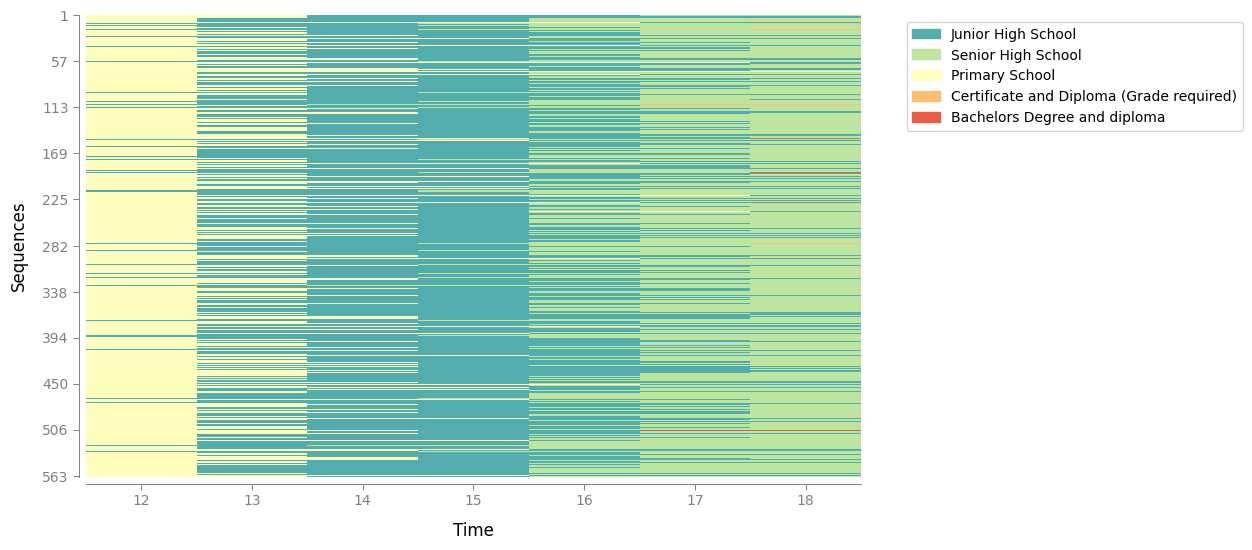

In [43]:
from sequenzo import plot_sequence_index

plot_sequence_index(
    sequence,
    sort_by=None,         # 序列排序规则，见下文
    figsize=(10, 6),      # 每个子图的大小
    title=None,           # 总体标题
    xlabel="Time",
    ylabel="Sequences",
    save_as=None,         # 保存输出文件（例如, "index.png"）
    dpi=200,
    layout="column",      # "column"（列） 或 "grid"（网格）
    nrows=None,           # 手动设置布局的行数（可选）
    ncols=None,           # 手动设置布局的列数（可选）
    group_order=None,     # 自定义分组顺序
    sort_groups="auto"
    )   # "auto" (自动), "numeric" (数字), "alpha" (字母), "none" (无)

In [44]:
df_cleaned

,id,12,13,14,15,16,17,18,gender,birth_year,has_child,gender
0,405423,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Senior High School,Senior High School,Female,1996,No,Female
1,491186,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Junior High School,Junior High School,Female,1996,Yes,Female
6,408736,Primary School,Junior High School,Junior High School,Junior High School,Senior High School,Senior High School,Senior High School,Female,1996,Yes,Female
10,408688,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Junior High School,Junior High School,Male,1996,NaN,Male
12,403109,Primary School,Junior High School,Junior High School,Junior High School,Senior High School,Senior High School,Senior High School,Male,1996,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1283,402253,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Junior High School,Junior High School,Female,1997,Yes,Female
1285,408487,Primary School,Junior High School,Junior High School,Junior High School,Senior High School,Senior High School,Senior High School,Male,1997,NaN,Male
1286,407614,Primary School,Primary School,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Male,1997,NaN,Male
1290,409346,Primary School,Primary School,Primary School,Primary School,Junior High School,Junior High School,Junior High School,Male,1997,NaN,Male


In [7]:
from sequenzo import *
import pandas as pd

file_path = 'Adult_W5_Anon_V1.0.0.dta'

df = pd.read_stata(file_path)

# df.to_csv('Adult_W5_Anon_V1.0.0.csv', index=False)

print(df.head())

column_names = df.columns.tolist()

print(column_names)

               w5_a_outcome  w5_hhid     pid w5_a_intrv_d w5_a_intrv_m  \
0  Successfully Interviewed   500000  640576          3rd      October   
1  Successfully Interviewed   500001  405734          2nd         June   
2  Successfully Interviewed   500002  305961         15th       August   
3  Successfully Interviewed   500002  731651         15th       August   
4  Successfully Interviewed   500003  303668         14th        March   

  w5_a_intrv_y w5_a_refexpl w5_a_refexpl_o w5_a_refint w5_a_refgen  ...  \
0       2017.0          NaN                        NaN         NaN  ...   
1       2017.0          NaN                        NaN         NaN  ...   
2       2017.0          NaN                        NaN         NaN  ...   
3       2017.0          NaN                        NaN         NaN  ...   
4       2017.0          NaN                        NaN         NaN  ...   

  w5_a_intlng10 w5_a_intlng11 w5_a_intlng_o                  w5_a_intresp  \
0           NaN           N

In [10]:
sequence = SequenceData(
    data=df,
    time=['w5_a_ed16lev', 'w5_a_ed15lev', 'w5_a_ed14lev', 'w5_a_ed13lev', 'w5_a_ed12lev', 'w5_a_ed11lev', 'w5_a_ed10lev', 'w5_a_ed09lev', 'w5_a_ed08lev'],
     states= ['Grade 8/Std. 6/Form 1',
                'Grade 7/Std. 5',
                'Grade 6/Std. 4',
                'Grade 9/Std. 7/Form 2',
                'Grade 5/Std. 3',
                'Grade 4/Std. 2',
                'Grade 10/Std. 8/Form 3',
                'Grade 3/Std. 1',
                'Grade 11/Std. 9/Form 4',
                'Grade 2/Sub B/Class 2',
                'Grade 12/Std. 10/Form 5/Matric/Senior Certificate',
                'Grade 1/Sub A/Class 1',
                'Missing',
                'Diploma requiring Grade 12/Std. 10',
                'Certificate requiring Grade 12/Std. 10',
                'Grade R/0',
                'Bachelors Degree',
                'Certificate not requiring Grade 12/Std. 10',
                'Other (specify)',
                'N4 (NATED)',
                'N2 (NATED)/NTC 2',
                'N1 (NATED)/NTC 1',
                'N3 (NATED)/NTC 3',
                'N6 (NATED)',
                'Diploma not requiring Grade 12/Std. 10',
                'N5 (NATED)',
                'National Certificate Vocational 3 (NCV 3)',
                'Bachelors Degree and diploma',
                'National Certificate Vocational 2 (NCV 2)',
                'Don\'t know',
                'National Certificate Vocational 4 (NCV 4)',],
    id_col='pid',
)

sequence


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 30110
[>] Number of time points: 9
[>] Min/Max sequence length: 0 / 9
[>] There are 225404 missing values across 28066 sequences.
    First few missing sequence IDs: [640576, 405734, 305961, 731651, 303668, 703450, 746176, 769557, 310664, 319004] ...
[>] Top sequences with the most missing time points:
    (Each row shows a sequence ID and its number of missing values)

             Missing Count
Sequence ID               
640576                   9
318720                   9
310696                   9
318565                   9
792509                   9
[>] States: ['Grade 8/Std. 6/Form 1', 'Grade 7/Std. 5', 'Grade 6/Std. 4', 'Grade 9/Std. 7/Form 2', 'Grade 5/Std. 3', 'Grade 4/Std. 2', 'Grade 10/Std. 8/Form 3', 'Grade 3/Std. 1', 'Grade 11/Std. 9/Form 4', 'Grade 2/Sub B/Class 2', 'Grade 12/Std. 10/Form 5/Matric/Senior Certificate', 'Grade 1/Sub A/Class 1', 'Missing', 'Diploma requiring Grade 12/Std.

KeyboardInterrupt: 

In [45]:
from sequenzo import plot_sequence_index
plot_sequence_index(
    sequence,
    group_by_column ='gender',
    layout='grid',
    title='sequence index plot by gender'
)

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [ ]:
from sequenzo import get_distance_matrix

om = get_distance_matrix(
    seqdata=sequence,   # SequenceData 对象
    method="OM",             # "OM", "OMspell", "HAM", "DHD", "LCP", 或 "RLCP"
    sm="TRATE",              # 替换成本的规格或矩阵（见下文）
    indel="auto",            # number | vector | "auto"（仅用于 OM/OMspell）
    norm="auto",             # "none" | "auto" | "maxlength" | "gmean" | "maxdist" | "YujianBo"
    full_matrix=True,        # 返回完整 n×n 矩阵
    refseq=None,             # 或传入两个索引集合：[idx_list_A, idx_list_B]
    tpow=1.0,                # 仅用于 OMspell：片段长度指数（spell-length exponent）
    expcost=0.5,             # 仅用于 OMspell：片段转换成本（spell transform cost）
    weighted=True,           # 在从数据构建 sm（如 "TRATE"）时考虑序列权重
    check_max_size=True      # 针对极多序列的安全检查防止超过pandas/numpy可支持的最大索引
)

In [ ]:
print(om.shape)

In [ ]:
# 创建一个从0到562的ID列表
entity_ids = list(range(563))

# 使用正确的entity_ids参数
cluster = Cluster(
    matrix=om, 
    entity_ids=entity_ids,
    clustering_method="ward"
)

In [ ]:
from sequenzo.clustering.hierarchical_clustering import Cluster, ClusterQuality, ClusterResults

# ---------------------
# distance_matrix: 距离矩阵 (n x n)
# ids: 长度为 n 的非重复 ID 列表/数组
# 一般推荐 "ward"
cluster = Cluster(
    matrix=om, 
    entity_ids=563, 
    clustering_method="ward"
)  

# 可选：画树状图（n 很大时会自动隐藏标签）
# 新手建议先试一下，帮助你直观看到层次结构
cluster.plot_dendrogram(
    # 不想保存就删掉这个参数
    save_as="dendrogram.png",  
    # 图标题
    title="Dendrogram" 
)

# ---------------------
# 用聚类质量指标（CQI）来帮助选择 k
cluster_quality = ClusterQuality(cluster, max_clusters=20)
cluster_quality.compute_cluster_quality_scores()

# 打印CQI表格信息，包含着每个CQI指标下计算得出的最优簇数 k 是什么
print(cluster_quality.get_cqi_table())     

# 想改保存文件名也可以
cluster_quality.plot_cqi_scores(save_as="quality.png") 

# ---------------------
# 导出结果
cluster_results = ClusterResults(cluster)

# 假设 CQI 图建议 k=6
# 取出簇成员表，表中包含两列：实体 ID 与 Cluster
members = cluster_results.get_cluster_memberships(num_clusters=6)     

# 查看每个簇的样本数与占比
distribution = cluster_results.get_cluster_distribution(num_clusters=6)   

cluster_results.plot_cluster_distribution(num_clusters=6, 
                                          save_as="cluster_sizes.png")